# 배추 객체 추출 관련 이미지 프로세싱 정리

## Mask-RCNN을 활용한 배추 객체 영역 추출

In [1]:
import os
import sys
import json
import datetime
import numpy as np
import skimage.draw
import time
import cv2
import cv2.aruco as aruco
from matplotlib import pyplot as plt

from pyaidoop.models.mask_rcnn import model as modellib, utils
from pyaidoop.models.mask_rcnn.config import Config
from pyaidoop.models.mask_rcnn.inference import MaskRcnnDetect


COCO_WEIGHTS_PATH = "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/mask_rcnn_object-train_0046.h5"

DEFAULT_LOGS_DIR = "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/logs/"

INPUT_IMAGE_PATH = "/home/jinwon/Documents/github/factory/packages/aidoop-r/object-tracker-python/temp/val/89.jpg"


# get width & height of input image
input_image = cv2.imread(INPUT_IMAGE_PATH, cv2.IMREAD_UNCHANGED)
height = input_image.shape[0]
width = input_image.shape[1]
print(f"input image size: {width} x {height}")


mrdetect = MaskRcnnDetect(COCO_WEIGHTS_PATH, DEFAULT_LOGS_DIR)

mask_list = mrdetect.detect_object_by_path(INPUT_IMAGE_PATH)

mask_image = mrdetect.get_mask_image(mask_list, width, height)

plt.imshow(input_image)
plt.title('Input Image')
plt.show()

plt.imshow(mask_image)
plt.title('Mask Image')
plt.show()






AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
print(mask_image.shape)


(338, 225)


## 추출된 영역 확인

In [11]:
import numpy as np
import math

def get_line_length(x1, y1, x2, y2):
    return math.sqrt((x2-x1)**2+(y2-y1)**2)

threshold result: 0.0


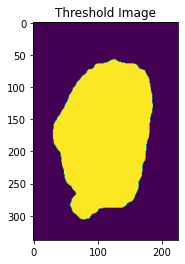

(338, 225, 3)
((103.8929443359375, 181.43496704101562), (148.57876586914062, 252.4720001220703), 7.305758953094482)
coordinate #1: (103.8929443359375, 181.43496704101562)
coordinate #2: (148.57876586914062, 252.4720001220703)
rotate angle: 7.305758953094482


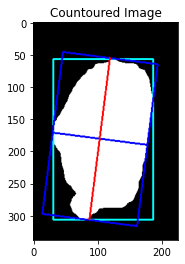

In [12]:
ret, thr_image = cv2.threshold(mask_image, 127, 255, cv2.THRESH_OTSU)
print(f"threshold result: {ret}")

plt.imshow(thr_image)
plt.title('Threshold Image')
plt.show()


contours,_ = cv2.findContours(thr_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
mask_image_rgb = cv2.cvtColor(mask_image, cv2.COLOR_GRAY2RGB)
print(mask_image_rgb.shape)

mask_image_copy = mask_image_rgb.copy()
for countour in contours:
    (x,y,w,h) = cv2.boundingRect(countour)
    cv2.rectangle(mask_image_copy, (x, y), (x + w, y + h), (0, 255, 255), 2)

    rect = cv2.minAreaRect(countour)
    print(rect)
    print('coordinate #1:', rect[0])
    print('coordinate #2:', rect[1])
    print('rotate angle:', rect[2])

    # get the rectangle coordinates of RotateRect
    box = cv2.boxPoints(rect)

    # to integer
    box = np.int0(box)

    # draw box
    cv2.drawContours(mask_image_copy,[box],0,(0,0,255),2)

    # draw center line
    xx1 = np.int0((box[0][0] + box[1][0])/2)
    yy1 = np.int0((box[0][1] + box[1][1])/2)
    xx2 = np.int0((box[2][0] + box[3][0])/2)
    yy2 = np.int0((box[2][1] + box[3][1])/2)

    len1 = get_line_length(xx1, yy1, xx2, yy2)

    xx3 = np.int0((box[0][0] + box[3][0])/2)
    yy3 = np.int0((box[0][1] + box[3][1])/2)
    xx4 = np.int0((box[2][0] + box[1][0])/2)
    yy4 = np.int0((box[2][1] + box[1][1])/2)  

    len2 = get_line_length(xx3, yy3, xx4, yy4)  
    
    if(len1 >= len2):
        color1 = (255, 0, 0)
        color2 = (0, 0, 255)
    else:
        color1 = (0, 0, 255)
        color2 = (255, 0, 0)

    cv2.line(mask_image_copy, (xx1, yy1), (xx2, yy2), color1, 2)
    cv2.line(mask_image_copy, (xx3, yy3), (xx4, yy4), color2, 2)



#cv2.rectangle(mask_image_copy, (x, y), (x + w, y + h), (0, 0, 255), 2)
# box = cv2.boxPoints(rect)
# box = np.int0(box)
# cv2.drawContours(mask_image_copy, [box], 0, (0, 0, 255), 2)

#cv2.drawContours(mask_image_copy, contours, -1, (0, 0, 255), 1)
plt.imshow(mask_image_copy)
plt.title('Countoured Image')
plt.show()


